# 과제

### Problem 1

1. scikit-learn에 있는 당뇨병 데이터를 활용해 선형회귀 문제를 풀려고 합니다.

- 필요한 패키지(`numpy`, `pandas`, `sklearn`)와 데이터(`load_diabetes`)를 불러오세요.
- x, y 데이터를 dataset의 data와 target으로 설정하세요.
- train data와 test data를 8:2 비율로 분할하세요.

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes


dataset = load_diabetes()
print(f'dataset keys: {list(dataset.keys())}')  # dataset: dictionary 형태

dataset keys: ['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [48]:
dataset['feature_names']    # 나이, 성별, BMI, 혈압, 그리고 비식별화된 6개의 혈청 수치

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [49]:
X_data = dataset['data']
y_data = dataset['target']

In [50]:
# 데이터 형태 살펴보기
print(X_data)
print(f'X_data/shape: {X_data.shape}')

print(y_data)
print(f'y_data/shape: {y_data.shape}')

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
X_data/shape: (442, 10)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 16

`sklearn.model_selection.train_test_split`의 argument들은 각자 매우 중요합니다.

1. `test_size` : test data의 비율을 설정합니다. (default : 0.25)
2. `stratify` : train data의 label class 비율과 test data의 label class 비율을 유지합니다. (default : None)  
이 옵션은 분류 문제를 풀 때 매우 중요합니다. 만약, train에는 0번 클래스가 아주 많은데, test에서는 매우 적다면 이 모델은 0번 클래스로만 대부분 예측할 것이며, test data의 성능은 매우 낮게 나올 것입니다. 이를 방지하기 위해 `stratify`를 사용합니다.
3. `shuffle` : 데이터를 섞을지 말지를 결정합니다. (default : True)
4. `random_state` : random seed를 설정합니다. (default : None)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_data, y_data, 
                 test_size=0.2, stratify=None, shuffle=True, random_state=42)

2. 위의 데이터를 가지고 아래의 LinearRegression 클래스에서 직접 경사하강법을 구현해보세요.

- `forward`에서 가설함수와 `loss`에서 비용함수를 정의하세요.
- `gradient`에서 weight(기울기)와 bias(절편)의 gradient를 구현해보세요.
- `fit`에서 다음과 같이 구현해보세요.
    - weight(기울기)와 bias(절편)를 각각 1과 0으로 초기화해보세요.
    - 위에서 지정한 loss(cost) 변수에 `loss`에서 구현한 비용함수를 지정하세요.
    - 위에서 지정한 weight(기울기), bias(절편) 변수에 `gradient`에서 구현한 gradient를 지정하세요.
    - weight(기울기), bias(절편)를 각각 업데이트 하세요.

$$ W\cdot x + b = 0 $$ 

<details>
<summary><stong>구현을 위한 추가 설명</strong></summary>

## 1. Regression의 의미

### 1.1 직선과 근처 점들의 표현

> 직선은 $\vec{W}\cdot \vec{X}+b=c$ 로 나타낼 수 있습니다.
> 

![[그림1-1] 직선의 정의](img/Linear%20Regression%20a2e51146e5f24dcaa59acfc62d035bb0/%25EC%25A0%259C%25EB%25AA%25A9_%25EC%2597%2586%25EB%258A%2594_%25EB%258B%25A4%25EC%259D%25B4%25EC%2596%25B4%25EA%25B7%25B8%25EB%259E%25A8-%25ED%258E%2598%25EC%259D%25B4%25EC%25A7%2580-1.drawio.png)

[그림1-1] 직선의 정의

직선 위의 점에 대한 위치벡터 $\vec{X}$, 직선의 법선벡터(normal vector: 수직 벡터) $\vec{W}$에 대해서 직선은 $**\vec{W}\cdot \vec{X}$가 일정합니다.**

이유는, 오른쪽 아래 내적($\cdot$)의 기하학적 의미를 통해 알 수 있습니다.
두 벡터의 내적은 한 벡터를 다른 벡터에 사영(projection) 한 길이와 해당 다른 벡터의 길이의 곱으로 정의됩니다. ⇒ $\vec{a}\cdot \vec{b}=\|a_l\|\|b\|=\|a\|\|b\|\cos \theta$

따라서 [그림1-1]을 보면, 법선벡터 $\vec{W}$와 직선 위의 점에 대한 위치벡터 $\vec{X}$에 대해서 내적이 일정함을 알 수 있습니다.

⇒ $\vec{W}\cdot\vec{X}=\|W\|\|X_l\|$, 이 때 모든 $\vec{X}$에 대해서 $\|X_l\|$ 일정
⇒ $\therefore \vec{W}\cdot\vec{X}=C=c-b$

> 직선 근처의 점에 대해서 $\vec{W}\cdot\vec{X}+b\lessgtr c$ 입니다.
> 

![[그림1-2]](img/Linear%20Regression%20a2e51146e5f24dcaa59acfc62d035bb0/%25EC%25A0%259C%25EB%25AA%25A9_%25EC%2597%2586%25EB%258A%2594_%25EB%258B%25A4%25EC%259D%25B4%25EC%2596%25B4%25EA%25B7%25B8%25EB%259E%25A8-%25ED%258E%2598%25EC%259D%25B4%25EC%25A7%2580-2.drawio.png)

[그림1-2]

파란 점들의 위치벡터는 법선벡터 $\vec{W}$에 대해 사영(projection)한 길이기 $\|X_l\|$보다 크므로,
$\vec{W}\cdot\vec{X}_\text{blue}+b>c$ 를 만족합니다.

같은 논리로 주황 점들의 위치벡터들은 $\vec{W}\cdot\vec{X}_\text{orange}+b<c$ 를 만족합니다.

### 1.2 가장 그럴듯한 직선 찾기

![[그림2-1] 가장 그럴듯한 직선](img/Linear%20Regression%20a2e51146e5f24dcaa59acfc62d035bb0/%25EC%25A0%259C%25EB%25AA%25A9_%25EC%2597%2586%25EB%258A%2594_%25EB%258B%25A4%25EC%259D%25B4%25EC%2596%25B4%25EA%25B7%25B8%25EB%259E%25A8-%25ED%258E%2598%25EC%259D%25B4%25EC%25A7%2580-3.drawio.png)

[그림2-1] 가장 그럴듯한 직선

![[그림2-2] 덜 그럴듯한 직선](img/Linear%20Regression%20a2e51146e5f24dcaa59acfc62d035bb0/%25EC%25A0%259C%25EB%25AA%25A9_%25EC%2597%2586%25EB%258A%2594_%25EB%258B%25A4%25EC%259D%25B4%25EC%2596%25B4%25EA%25B7%25B8%25EB%259E%25A8-%25ED%258E%2598%25EC%259D%25B4%25EC%25A7%2580-4.drawio.png)

[그림2-2] 덜 그럴듯한 직선

위의 두 그림을 비교하면 [그림 2-1]이 더 그럴듯한 직선인 것을 알 수 있고 이것은 각 점에 대해서 $\vec{W}\cdot \vec{X}+b$ 값과 추측한 직선에 대한 $\vec{W}\cdot \vec{X}+b$ 값의 차이가 최소가 되도록 하는 직선이 더 좋은 직선임을 알 수 있습니다.

즉 우리는 실제 각 점이 따르는 값 $y=\vec{W}_\text{best}\cdot \vec{X}+b_\text{best}$ 와 
우리가 추측한 직선 $\hat{y}=\vec{W}_\text{pred}\cdot\vec{X}+b_\text{pred}$ 의 차이를 최소로 만들면 됩니다.

이를 위해 Loss함수를 다음과 같이 적절히 설정하면,

$$
\begin{aligned}
L(X;W,b)&={1\over 2}\sum_{x\in X}\big(\hat{y}-y\big)^2\\
&={1\over 2}\sum_{x\in X}(\vec{W}\cdot \vec{x}+b-y)^2
\end{aligned}
$$

$$
\begin{aligned}
&{dL\over dW}=(\vec{W}\cdot \vec{x}+b-y)\vec{x}\\
&{dL\over db}=(\vec{W}\cdot \vec{x}+b)\cdot 1
\end{aligned}
$$

따라서 위의 loss와 미분으로 gradient descent를 진행해 올바른 $\vec{W}$와 $b$를 찾으면 됩니다.

</details>

In [52]:
class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.w = None # weight
        self.b = None # bias
        self.lr = learning_rate # learning_rate
        self.losses = [] # losses for each epoch
        self.weight_history = [] # weight for each epoch
        self.bias_history = [] # bias for each epoch
        
    def forward(self, x):
        y_pred = x@self.w.T + self.b  # hypothesis function
        return y_pred

    def loss(self, x, y):
        y_pred = self.forward(x)
        return  np.sum(0.5 * (y_pred - y)** 2) # cost function

    def gradient(self, x, y):
        y_pred = self.forward(x)
        w_grad = (y_pred - y) * x  # weight gradient
        b_grad = (y_pred - y)   # bias gradient

        return w_grad, b_grad

    def fit(self, x_data, y_data, epochs=1000):
        self.w = np.ones((1, x_data.shape[1])) # initialize weights to 1
        self.b = 0 # initialize bias to 0
        for epoch in range(epochs):
            l = 0 # initial value of loss
            w_grad = np.zeros(x_data.shape[1]) # array for gradient of weight
            b_grad = 0  # variable for gradient of bias

            for x,y in zip(x_data, y_data):
                # compute loss(cost) function in initial value
                l += self.loss(x, y)

                # compute gradient value in initial value
                w_i, b_i = self.gradient(x, y)
                w_grad += w_i
                b_grad += b_i

            self.w -= self.lr * w_grad / y_data.shape[0] # update weight 
            self.b -= self.lr * b_grad / y_data.shape[0] # update bias 

            print(f'epoch : {epoch+1} | loss : {l/len(y_data):.3f}')

            self.losses.append(l/len(y_data)) # save loss
            self.weight_history.append(self.w) # save weight
            self.bias_history.append(self.b) # save bias
            
model = LinearRegression()
model.fit(X_train, y_train)

epoch : 1 | loss : 14845.165
epoch : 2 | loss : 14609.773
epoch : 3 | loss : 14379.061
epoch : 4 | loss : 14152.937
epoch : 5 | loss : 13931.309
epoch : 6 | loss : 13714.087
epoch : 7 | loss : 13501.184
epoch : 8 | loss : 13292.514
epoch : 9 | loss : 13087.993
epoch : 10 | loss : 12887.538
epoch : 11 | loss : 12691.068
epoch : 12 | loss : 12498.504
epoch : 13 | loss : 12309.768
epoch : 14 | loss : 12124.784
epoch : 15 | loss : 11943.477
epoch : 16 | loss : 11765.775
epoch : 17 | loss : 11591.605
epoch : 18 | loss : 11420.897
epoch : 19 | loss : 11253.582
epoch : 20 | loss : 11089.593
epoch : 21 | loss : 10928.864
epoch : 22 | loss : 10771.329
epoch : 23 | loss : 10616.926
epoch : 24 | loss : 10465.591
epoch : 25 | loss : 10317.264
epoch : 26 | loss : 10171.884
epoch : 27 | loss : 10029.394
epoch : 28 | loss : 9889.736
epoch : 29 | loss : 9752.853
epoch : 30 | loss : 9618.690
epoch : 31 | loss : 9487.193
epoch : 32 | loss : 9358.309
epoch : 33 | loss : 9231.986
epoch : 34 | loss : 9108.

Loss를 출력해보면 아주 이상적으로 수렴하는 것을 볼 수 있습니다.

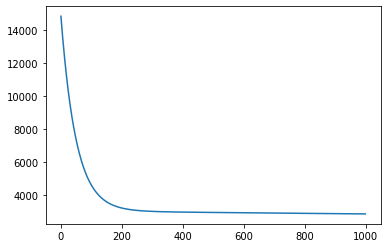

In [53]:
import matplotlib.pyplot as plt

# Loss plotting
plt.plot(model.losses)

우리가 설정한 Loss 함수에 맞춰 ($ L(X;W,b)={1\over 2}\sum_{x\in X}\big(\hat{y}-y\big)^2 $) test data에 대해 평균 loss를 구해봅니다.

In [55]:
np.mean(0.5*(model.forward(X_test) - y_test)**2)

2683.937610248354

3. 위의 데이터를 가지고 확률적 경사하강법을 활용한 선형회귀를 구현해보세요.

- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.
- scikit-learn에 있는 모델을 활용해 확률적 경사하강법을 구현하세요.

In [56]:
from sklearn.linear_model import SGDRegressor

# X_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=42)

reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
reg.fit(X_train, y_train)

/home/user/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(random_state=42)

`intercept_`는 직선의 기울기(법선벡터)를 의미하고 `coef_`는 직선의 절편을 의미합니다.

In [57]:
reg.intercept_, reg.coef_

(array([152.34445284]),
 array([  56.24514378,  -41.62986122,  261.98650671,  187.45235089,
          28.72524435,    4.08608743, -144.23304002,  134.04017648,
         218.42199335,  132.07682103]))

Linearmodel 구현에서와 같은 loss 함수를 통해 test data에 대한 loss를 구해봤을 때 SGDRegressor의 loss가 더 작은 것을 확인할 수 있습니다.

In [63]:
np.mean(0.5 * (reg.predict(X_test) - y_test)**2)

1555.940284455799

### Problem 2
Scikit-learn의 datasets 서브 패키지에는 선형 회귀/로지스틱 회귀용 가상 데이터를 생성할 수 있는 명령어인 `make_regression()`, `make_classification()`이 있습니다. 다음 명령어를 활용해 선형 회귀와 로지스틱 회귀를 구현하세요.

1. `make_regression()`을 활용해 선형 회귀용 가상 데이터를 생성하세요.

- sample은 5000개, feature variable은 2개로 지정하세요.
- y절편을 10 증가시키고, 전체적인 데이터의 variance를 10으로 지정하세요.

In [1]:
from sklearn.datasets import make_classification, make_regression

# coef=True: 회귀 계수를 반환
x, y, c = make_regression(n_samples=5000, n_features=2, bias=10, noise=10, coef=True, random_state=42)

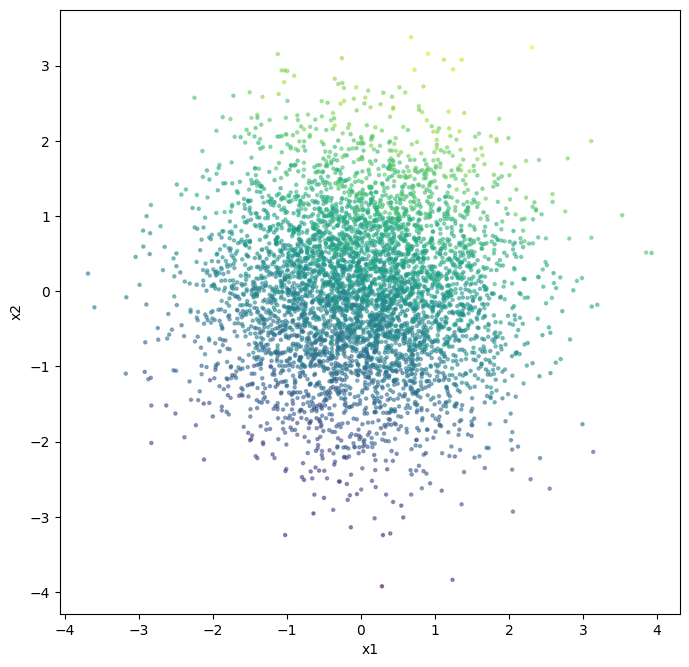

In [2]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams['figure.dpi'] = 100

plt.scatter(x[:,0], x[:,1], c=y, s=5, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

2. 위의 데이터를 가지고 선형회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

std_scale = StandardScaler(with_mean=True, with_std=True)

x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.transform(x_test)

reg = LinearRegression()
reg.fit(x_train_std, y_train)
print(reg.coef_, reg.intercept_)

[10.21856825 32.35317005] 9.582037947086588


LinearRegression 클래스로 선형회귀 결과 coef는 위와 같고, 실제 make_regression에서 만들어진 데이터의 coef와 비교해보면 매우 유사한 것을 볼 수 있습니다.

In [4]:
c

array([10.30191944, 32.12551734])

3. `make_classification()`을 활용해 로지스틱 회귀용 가상 데이터를 생성하세요.

- sample은 1000개, feature variable은 1개로 지정하세요.
- feature variable을 1개로 지정했기 때문에, 관련된 변수들을 모두 조정해야 합니다. `n_informative`, `n_redundant`, `n_cluster_per_class` 의 변수를 알맞게 조정해보세요.

In [85]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=5000, n_features=1, n_classes=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

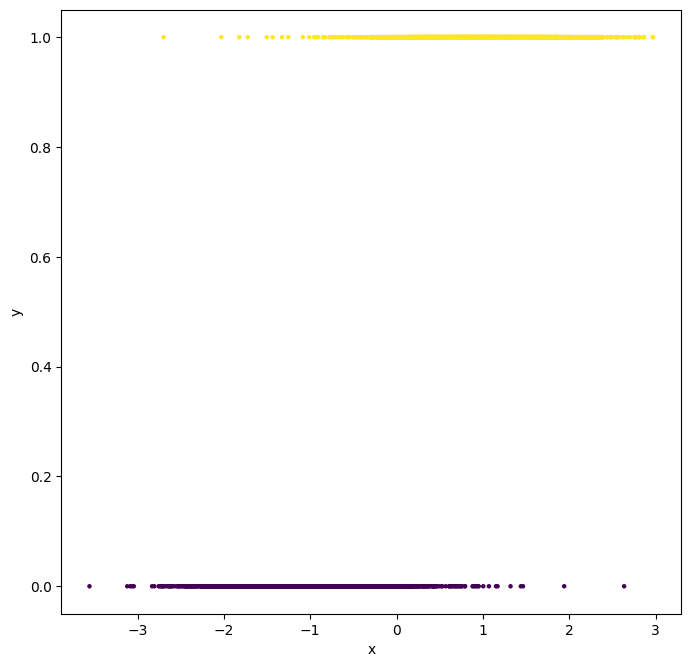

In [86]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c=y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. 위의 데이터를 가지고 로지스틱 회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 규제는 'l2'로, 규제를 제어하는 매개변수는 1로 지정하고, iteration은 1000으로 지정합니다.

In [87]:
from sklearn.linear_model import LogisticRegression


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

reg = LogisticRegression()
reg.fit(x_train, y_train)
print(reg.coef_, reg.intercept_)

[[4.31810409]] [-0.09364067]


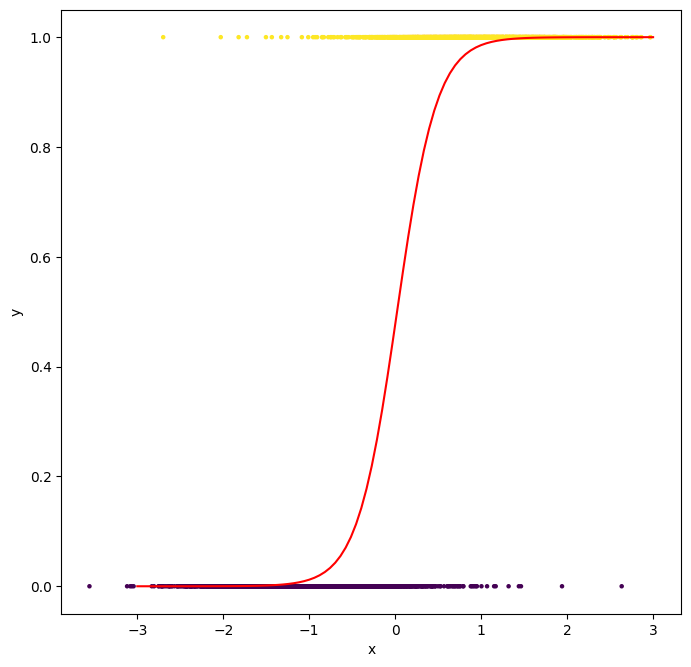

In [88]:
import matplotlib.pyplot as plt

# fitting된 모델의 decision boundary를 그리는 함수
plt.scatter(x, y, c=y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(np.linspace(-3, 3, 100), reg.predict_proba(np.linspace(-3, 3, 100).reshape(-1, 1))[:,1], c='r')
plt.show()